# NLP Project

In [99]:
# Import package

import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt


In [100]:
# Import Dataset

total_data = pd.read_csv('/workspaces/gustavolima-NLP_Project/data/raw/url_spam.csv')
total_data.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,True
1,https://www.hvper.com/,True
2,https://briefingday.com/m/v4n3i4f3,True
3,https://briefingday.com/n/20200618/m#commentform,False
4,https://briefingday.com/fan,True


#### Data Processing

In [101]:
total_data['is_spam'] = total_data['is_spam'].apply(lambda x: 1 if x == True else 0).astype(int)
total_data.head()

,url,is_spam
0,https://briefingday.us8.list-manage.com/unsubs...,1
1,https://www.hvper.com/,1
2,https://briefingday.com/m/v4n3i4f3,1
3,https://briefingday.com/n/20200618/m#commentform,0
4,https://briefingday.com/fan,1


In [102]:
# Count the amount of True / False

print(total_data.shape)
print(f'Spam: {len(total_data.loc[total_data.is_spam == 1])}')
print(f'No spam: {len(total_data.loc[total_data.is_spam == 0])}')

(2999, 2)
Spam: 696
No spam: 2303


In [103]:
total_data = total_data.drop_duplicates()
total_data = total_data.reset_index(inplace = False, drop = True)
total_data.shape

(2369, 2)

##### Process Text

In [104]:
import regex as re

def preprocess_text(text):
    # Remove any character that is not a letter (a-z) or white space ( )
    text = re.sub(r'[^a-z ]', ' ', text)

    # Remove white spaces
    text = re.sub(r'\s+[a-zA-Z]\s+', ' ', text)
    text = re.sub(r'\^[a-zA-Z]\s+', ' ', text)

    # Multiple white spaces into one
    text = re.sub(r'\s+', ' ', text.lower())

    # Remove tags
    text = re.sub('&lt;/?.*?&gt;',' &lt;&gt; ', text)

    # Remove suffixes and prefixes
    text = re.sub(r'https|www|com',' ', text)

    # Remove single letters
    text = re.sub(r'\b[a-z]\b',' ', text)              

    return text.split()

total_data['url'] = total_data['url'].apply(preprocess_text)
total_data.head()

,url,is_spam
0,"[briefingday, us, list, manage, unsubscribe]",1
1,[hvper],1
2,[briefingday],1
3,"[briefingday, mentform]",0
4,"[briefingday, fan]",1


In [105]:
from nltk import download
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
download('wordnet')
lemmatizer = WordNetLemmatizer()

download('stopwords')
stop_words = stopwords.words('english')

def lemmatize_text(words, lemmatizer = lemmatizer):
    tokens = [lemmatizer.lemmatize(word) for word in words]
    tokens = [word for word in tokens if word not in stop_words]
    tokens = [word for word in tokens if len(word) > 3]
    return tokens

total_data['url'] = total_data['url'].apply(lemmatize_text)
total_data.head()

[nltk_data] Downloading package wordnet to /home/vscode/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to /home/vscode/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,url,is_spam
0,"[briefingday, list, manage, unsubscribe]",1
1,[hvper],1
2,[briefingday],1
3,"[briefingday, mentform]",0
4,[briefingday],1


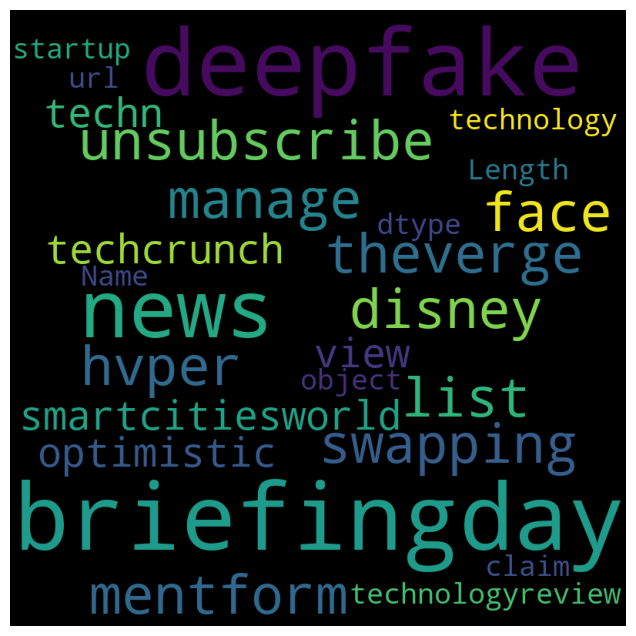

In [106]:
import matplotlib.pyplot as plt
from wordcloud import WordCloud

wordcloud = WordCloud(width = 800, height = 800, background_color = 'black', max_words = 1000, min_font_size = 20, random_state = 42)\
    .generate(str(total_data['url']))

fig = plt.figure(figsize = (8, 8), facecolor = None)
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

In [107]:
from sklearn.feature_extraction.text import TfidfVectorizer

tokens_list = total_data['url']
tokens_list = [' '.join(tokens) for tokens in tokens_list]

vectorizer = TfidfVectorizer(max_features = 5000, max_df = 0.8, min_df = 5)
X = vectorizer.fit_transform(tokens_list).toarray()
y = total_data['is_spam']

X[:5]

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

#### Train the Model


In [108]:
# Split the Dataset
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42)

In [109]:
# Train the Model
from sklearn.svm import SVC

model = SVC(kernel = 'linear', random_state = 42)
model.fit(X_train, y_train)

SVC(kernel='linear', random_state=42)

In [110]:
# Predict
y_pred = model.predict(X_test)
y_pred

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [111]:
# Check Accuracy
from sklearn.metrics import accuracy_score

accuracy_score(y_test, y_pred)

0.9535864978902954

In [112]:
# Save the Model
from pickle import dump

dump(model, open('/workspaces/gustavolima-NLP_Project/models/svm_classifier_linear_42.sav', 'wb'))

#### Optimize the Model

In [113]:
from sklearn.model_selection import GridSearchCV

# Define parameters
hyperparams = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.001, 0.1, 1, 10],
}

# We initialize the grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

GridSearchCV(cv=5, estimator=SVC(kernel='linear', random_state=42),
             param_grid={'C': [0.1, 1, 10],
                         'gamma': ['scale', 'auto', 0.001, 0.1, 1, 10],
                         'kernel': ['linear', 'poly', 'rbf', 'sigmoid']},
             scoring='accuracy')

In [114]:
grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")

Best hyperparameters: {'C': 10, 'gamma': 0.1, 'kernel': 'rbf'}


In [117]:
model_grid = SVC(C=10, gamma=0.1, kernel='rbf', random_state = 42)
model_grid.fit(X_train, y_train)
y_pred = model_grid.predict(X_test)

grid_accuracy = accuracy_score(y_test, y_pred)
grid_accuracy

0.9620253164556962

#### Try with other Parameters

In [ ]:
from sklearn.model_selection import GridSearchCV

# Define parameters
hyperparams = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'poly', 'rbf', 'sigmoid'],
    'gamma': ['scale', 'auto', 0.001, 0.1, 1, 10],
    'class_weight': [None, 'balanced']
    'degree': [2, 3, 4],
    'decision_function_shape': ['ovr', 'ovo']
    'probability': [True, False],
    'shrinking': [True, False],
}

# We initialize the grid
grid = GridSearchCV(model, hyperparams, scoring = "accuracy", cv = 5)
grid

In [ ]:
grid.fit(X_train, y_train)

print(f"Best hyperparameters: {grid.best_params_}")